In [1]:
#import dependencies
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# read in csv file ('tayler_swift_spotify.csv') from same folder
tswift_data = pd.read_csv("taylor_swift_spotify.csv")

# display the first few rows to see what the data looks like
tswift_data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Mine (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,1,7G0gBu6nLdhFDPRLc0HdDG,spotify:track:7G0gBu6nLdhFDPRLc0HdDG,0.00444,0.646,0.783,0.000001,0.171,-2.846,0.0356,121.080,0.490,83,231706
1,1,Sparks Fly (Taylor’s Version),Speak Now (Taylor's Version),2023-07-07,2,3MytWN8L7shNYzGl4tAKRp,spotify:track:3MytWN8L7shNYzGl4tAKRp,0.02510,0.588,0.758,0.000000,0.131,-2.347,0.0305,114.991,0.387,81,261230
2,2,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,3,79uDOz0zuuWS7HWxzMmTa2,spotify:track:79uDOz0zuuWS7HWxzMmTa2,0.00621,0.497,0.635,0.000000,0.117,-3.927,0.0273,142.063,0.203,84,294189
3,3,Speak Now (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,4,5xXqyjLicvEpch72qEryFT,spotify:track:5xXqyjLicvEpch72qEryFT,0.24800,0.727,0.677,0.000000,0.143,-2.871,0.0325,118.995,0.639,80,242473
4,4,Dear John (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,5,1zU8j1x3yi9xalMF96pzKp,spotify:track:1zU8j1x3yi9xalMF96pzKp,0.02360,0.419,0.470,0.000000,0.163,-5.016,0.0296,119.294,0.133,80,405906


In [3]:
# how many rows are there in the dataset (each song has a unique song id)
# we will use this in a moment to check how many duplicates there were
tswift_data['id'].count()

476

In [4]:
# remove columns which we don't need, uri and the unnamed column
swift_reduced = tswift_data[['name', 'album', 'release_date', 'id', 'acousticness', 'danceability', 'energy', 
                             'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
                             'duration_ms']]

# drop columns which are duplicates in name and every numerical column (they are true duplicates, in that sense)
swift_df = swift_reduced.drop_duplicates(subset=['name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                                                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms'])

# check that there are fewer rows, how many duplicates were removed
# original count for unique ids was 476
# after the duplicates are removed there are 420 rows, so 56 duplicates were removed

# swift_df is the dataframe we should all use for our analysis, has no duplicate rows and no unneeded columns
swift_df

,name,album,release_date,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Mine (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,7G0gBu6nLdhFDPRLc0HdDG,0.00444,0.646,0.783,0.000001,0.1710,-2.846,0.0356,121.080,0.490,83,231706
1,Sparks Fly (Taylor’s Version),Speak Now (Taylor's Version),2023-07-07,3MytWN8L7shNYzGl4tAKRp,0.02510,0.588,0.758,0.000000,0.1310,-2.347,0.0305,114.991,0.387,81,261230
2,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,79uDOz0zuuWS7HWxzMmTa2,0.00621,0.497,0.635,0.000000,0.1170,-3.927,0.0273,142.063,0.203,84,294189
3,Speak Now (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,5xXqyjLicvEpch72qEryFT,0.24800,0.727,0.677,0.000000,0.1430,-2.871,0.0325,118.995,0.639,80,242473
4,Dear John (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,1zU8j1x3yi9xalMF96pzKp,0.02360,0.419,0.470,0.000000,0.1630,-5.016,0.0296,119.294,0.133,80,405906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Our Song,Taylor Swift,2006-10-24,1j6gmK6u4WNI33lMZ8dC1s,0.11100,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,69,201106
472,I'm Only Me When I'm With You,Taylor Swift,2006-10-24,7CzxXgQXurKZCyHz9ufbo1,0.00452,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,59,213053
473,Invisible,Taylor Swift,2006-10-24,1k3PzDNjg38cWqOvL4M9vq,0.63700,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,57,203226
474,A Perfectly Good Heart,Taylor Swift,2006-10-24,0YgHuReCSPwTXYny7isLja,0.00349,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,56,220146


In [5]:
#calculate the correlation between 'tempo' and 'valence'
correlation = swift_df['tempo'].corr(tswift_data['valence'])

#summary statistics
summary_stats = swift_df[['tempo', 'valence']].describe()

print(f'correlation between tempo and valence:{correlation}')

correlation between tempo and valence:0.12114750009973596


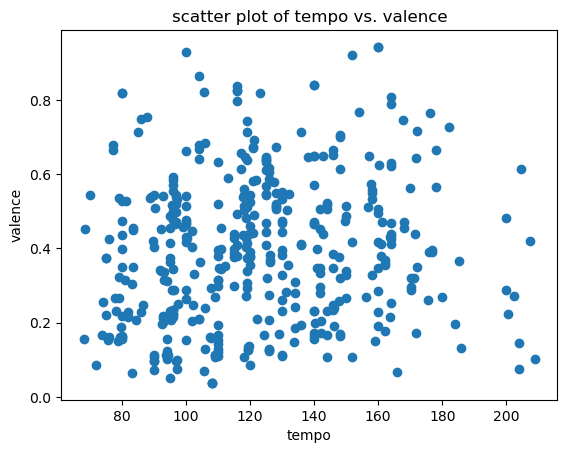

In [6]:
#create scatter plot
plt.scatter(swift_df['tempo'], swift_df['valence'])
plt.xlabel('tempo')
plt.ylabel('valence')
plt.title('scatter plot of tempo vs. valence')
plt.show()


In [7]:
#calculate the correlation between 'energy' and 'danceability'
correlation = swift_df['energy'].corr(swift_df['danceability'])

#summary statistics
summary_stats = swift_df[['energy', 'danceability']].describe()

print(f'correlation between energy and danceability:{correlation}')

correlation between energy and danceability:-0.015746249947216642


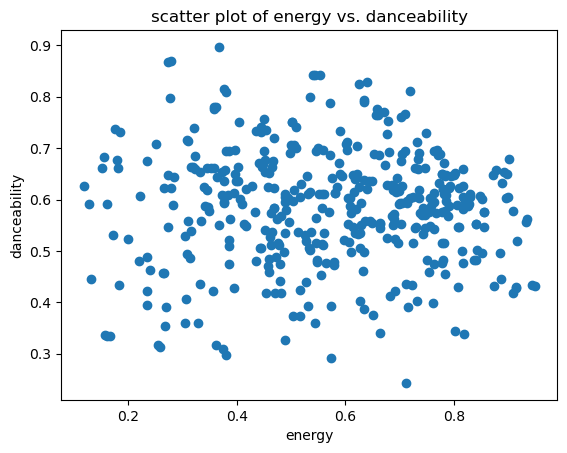

In [8]:
#create scatter plot
plt.scatter(swift_df['energy'], swift_df['danceability'])
plt.xlabel('energy')
plt.ylabel('danceability')
plt.title('scatter plot of energy vs. danceability')
plt.show()

album
Fearless (Platinum Edition)    48.157895
Fearless (Taylor's Version)    70.307692
Name: popularity, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

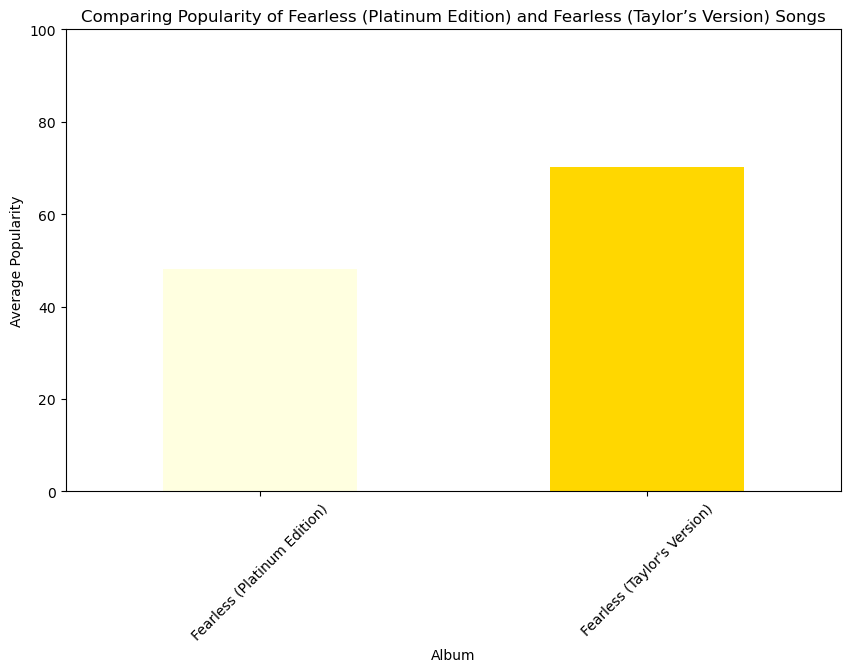

In [6]:
# Filter the DataFrame
fearless_songs = swift_df[swift_df['album'].isin(["Fearless (Platinum Edition)", "Fearless (Taylor's Version)"])]

# Group by album and calculate mean popularity
avg_popularity = fearless_songs.groupby('album')['popularity'].mean()

# Print avg_popularity to ensure it contains data
print(avg_popularity)

# Create a bar graph
avg_popularity.plot(kind='bar', figsize=(10, 6), color=['#FFFFE0', '#FFD700'])

# Customize the plot
plt.title('Comparing Popularity of Fearless (Platinum Edition) and Fearless (Taylor’s Version) Songs')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Since popularity scores range from 0-100
plt.show

album
Speak Now (Deluxe Package)      53.200000
Speak Now (Taylor's Version)    79.363636
Name: popularity, dtype: float64


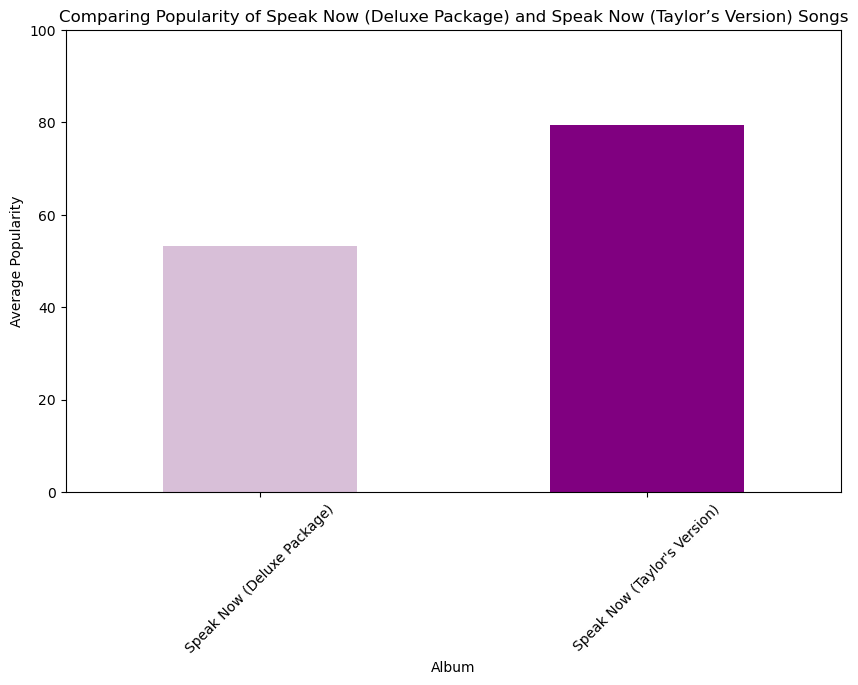

In [7]:
# Filter the DataFrame
# Filtering condition
condition = swift_df['album'].isin(["Speak Now (Deluxe Package)", "Speak Now (Taylor's Version)"])

# Apply condition to DataFrame
speak_now_songs = swift_df[condition]

# Group by album and calculate mean popularity
avg_popularity = speak_now_songs.groupby('album')['popularity'].mean()

# Print avg_popularity to ensure it contains data
print(avg_popularity)

# Create a bar graph
avg_popularity.plot(kind='bar', figsize=(10, 6), color=['#D8BFD8', '#800080'])  # Changed the colors to differentiate

# Customize the plot
plt.title('Comparing Popularity of Speak Now (Deluxe Package) and Speak Now (Taylor’s Version) Songs')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Since popularity scores range from 0-100

# Show the plot
plt.show()

album
Red (Deluxe Edition)      50.944444
Red (Taylor's Version)    72.766667
Name: popularity, dtype: float64


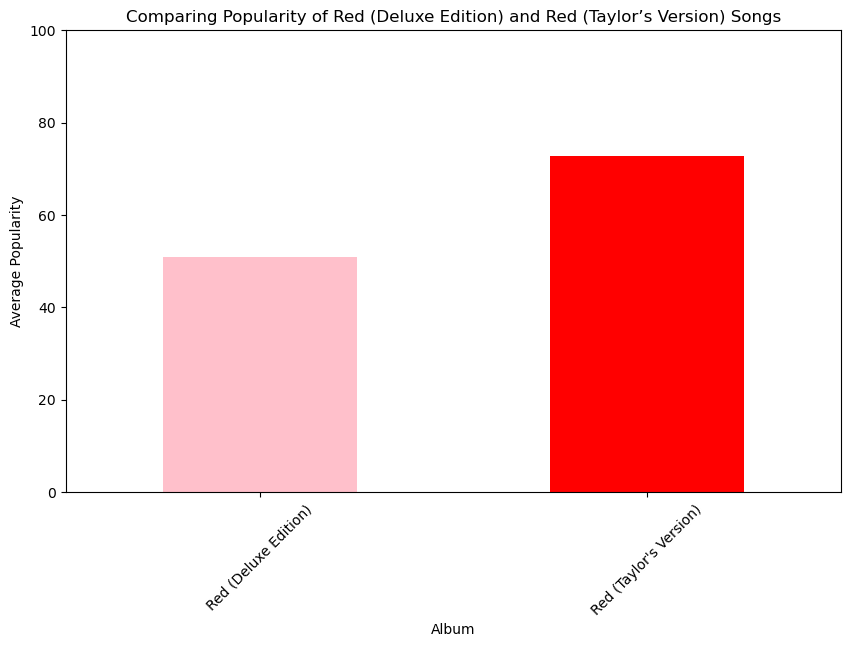

In [8]:
# Filter the DataFrame
# Filtering condition
condition = swift_df['album'].isin(["Red (Deluxe Edition)", "Red (Taylor's Version)"])

# Apply condition to DataFrame
red_songs = swift_df[condition]  # Changed variable name to match the albums

# Group by album and calculate mean popularity
avg_popularity = red_songs.groupby('album')['popularity'].mean()

# Print avg_popularity to ensure it contains data
print(avg_popularity)

# Create a bar graph
avg_popularity.plot(kind='bar', figsize=(10, 6), color=['#FFC0CB', '#FF0000'])  # Changed the colors to match the album theme

# Customize the plot
plt.title('Comparing Popularity of Red (Deluxe Edition) and Red (Taylor’s Version) Songs')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Since popularity scores range from 0-100

# Show the plot
plt.show()